In [58]:
import csv
import pandas as pd
from pandas import *
from __future__ import division
from pandas.tseries.offsets import *
import dateutil.rrule as dr
import dateutil.parser as dp
import dateutil.relativedelta as drel
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

In [59]:
pd.options.mode.chained_assignment = None

In [60]:
#kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11],)
#kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,3,4,6,8,10,11],
#                names=['delinquency','age','3059late','income','90late','6089late','dependents'])
#kctest = read_csv('/Users/marco/documents/github/data/kcredittest.csv', header=0, usecols=[3,4,6,8,10,11],
#               names=['age','3059late','90late','income','6089late','dependents'])
kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,3,4,8,10,11],
                names=['delinquency','age','late3059','late90','late6089','dependents'])
kctest = read_csv('/Users/marco/documents/github/data/kcredittest.csv', header=0, usecols=[3,4,8,10,11],
               names=['age','late3059','late90','late6089','dependents'])

In [61]:
kctrain.head(3)

,delinquency,age,late3059,late90,late6089,dependents
0,1,45,2,0,0,2
1,0,40,0,0,0,1
2,0,38,1,1,0,0


In [62]:
kctest.head(3)

,age,late3059,late90,late6089,dependents
0,43,0,0,0,0
1,57,0,0,0,2
2,59,0,0,0,2


In [63]:
kctrain.shape

(150000, 6)

In [64]:
#kctrain['late3059'][kctrain['late3059'] == 96] = np.nan
#kctrain['late3059'][kctrain['late3059'] == 98] = np.nan
#kctrain['late6089'][kctrain['late6089'] == 96] = np.nan
#kctrain['late6089'][kctrain['late6089'] == 98] = np.nan
#kctrain['late90'][kctrain['late90'] == 96] = np.nan
#kctrain['late90'][kctrain['late90'] == 98] = np.nan

In [65]:
kctrain['late3059'][kctrain['late3059'] == 96] = 5
kctrain['late3059'][kctrain['late3059'] == 98] = 5
kctrain['late6089'][kctrain['late6089'] == 96] = 5
kctrain['late6089'][kctrain['late6089'] == 98] = 5
kctrain['late90'][kctrain['late90'] == 96] = 5
kctrain['late90'][kctrain['late90'] == 98] = 5

In [66]:
kctrain['dependents'][kctrain['dependents'] > 5] = 6

In [67]:
kctrain['age'][kctrain['age'] < 21] = 20
kctrain['age'][kctrain['age'] > 95] = 95

In [68]:
kctrain['late90'][kctrain['late90'] == 96].sum()

0

In [69]:
#kctrain = kctrain.dropna(thresh=len(kctrain), axis=1)
kctrain = kctrain.dropna()

In [70]:
#kctest.fillna(0)

In [71]:
kctrain.shape

(146076, 6)

In [72]:
kctrain.isnull().sum()

delinquency    0
age            0
late3059       0
late90         0
late6089       0
dependents     0
dtype: int64

In [73]:
kctrain['sumlate'] = kctrain.late3059 + kctrain.late6089 + kctrain.late90

In [74]:
ageamp = max(kctrain.age)-min(kctrain.age)
kctrain.age = (ageamp-(kctrain.age-min(kctrain.age)))/ageamp
print min(kctrain.age), max(kctrain.age)

0.0 1.0


In [75]:
sumlateamp = max(kctrain.sumlate)-min(kctrain.sumlate)
kctrain.sumlate = (kctrain.sumlate-min(kctrain.sumlate))/sumlateamp
print min(kctrain.sumlate), max(kctrain.sumlate)

0.0 1.0


In [76]:
late30amp = max(kctrain.late3059)-min(kctrain.late3059)
kctrain.late3059 = (kctrain.late3059-min(kctrain.late3059))/late30amp
print min(kctrain.late3059), max(kctrain.late3059)

0.0 1.0


In [77]:
late60amp = max(kctrain.late6089)-min(kctrain.late6089)
kctrain.late6089 = (kctrain.late6089-min(kctrain.late6089))/late60amp
print min(kctrain.late6089), max(kctrain.late6089)

0.0 1.0


In [78]:
late90amp = max(kctrain.late90)-min(kctrain.late90)
kctrain.late90 = (kctrain.late90-min(kctrain.late90))/late90amp
print min(kctrain.late90), max(kctrain.late90)

0.0 1.0


In [79]:
depamp = max(kctrain.dependents)-min(kctrain.dependents)
kctrain.dependents = (kctrain.dependents-min(kctrain.dependents))/depamp
print min(kctrain.dependents), max(kctrain.dependents)

0.0 1.0


In [80]:
kctrain.head(3)

,delinquency,age,late3059,late90,late6089,dependents,sumlate
0,1,0.666667,0.153846,0.000000,0,0.333333,0.105263
1,0,0.733333,0.000000,0.000000,0,0.166667,0.000000
2,0,0.760000,0.076923,0.058824,0,0.000000,0.105263


In [81]:
X = kctrain.drop(['delinquency','late3059','late6089','late90'], 1)
y = kctrain['delinquency']
#X = kctrain.drop('SeriousDlqin2yrs', 1)
#y = kctrain['SeriousDlqin2yrs']
X.head(3)

,age,dependents,sumlate
0,0.666667,0.333333,0.105263
1,0.733333,0.166667,0.000000
2,0.760000,0.000000,0.105263


In [82]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1, random_state=0)

In [83]:
#acc_scores = {}
#for n in range(20):
#    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
#    y_pred = clf.predict(X_test)
#    acc_scores.setdefault((n+1), [])
#    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred))

In [84]:
#nmax = max(acc_scores, key=acc_scores.get)
nmax = 19
nmax

19

In [85]:
X_test = X_test.astype(float)
clf = KNeighborsClassifier(n_neighbors = (nmax))
knn_model = clf.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)

In [86]:
X_test = X_test.astype(float)
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)

In [87]:
X_test = X_test.astype(float)
clf = SVC(probability=True)
svc_model = clf.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.predict_proba(X_test)

In [88]:
X_test = X_test.astype(float)
clf = GaussianNB()
gnb_model = clf.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
y_proba_gnb = gnb_model.predict_proba(X_test)

In [89]:
X_test = X_test.astype(float)
clf = DecisionTreeClassifier()
dtc_model = clf.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
y_proba_dtc = dtc_model.predict_proba(X_test)

In [90]:
X_test = X_test.astype(float)
clf = RandomForestClassifier()
rfc_model = clf.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
y_proba_rfc = rfc_model.predict_proba(X_test)

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_knn[:,1])
roc_auc_knn = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_knn, pos_label = None, average = None)

(array([ 0.9422486 ,  0.51736111]),
 array([ 0.9898034 ,  0.15266393]),
 array([ 0.96544076,  0.23575949]),
 array([13632,   976]))

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_log[:,1])
roc_auc_log = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_log, pos_label = None, average = None)

(array([ 0.94126234,  0.59009009]),
 array([ 0.99332453,  0.13422131]),
 array([ 0.9665929 ,  0.21869783]),
 array([13632,   976]))

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_svc[:,1])
roc_auc_svc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_svc, pos_label = None, average = None)

(array([ 0.93466923,  0.66666667]),
 array([ 0.99911972,  0.02459016]),
 array([ 0.96582045,  0.04743083]),
 array([13632,   976]))

In [94]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_gnb[:,1])
roc_auc_gnb = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_gnb, pos_label = None, average = None)

(array([ 0.95153774,  0.4552352 ]),
 array([ 0.97366491,  0.30737705]),
 array([ 0.96247417,  0.36697248]),
 array([13632,   976]))

In [95]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_dtc[:,1])
roc_auc_dtc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_dtc, pos_label = None, average = None)

(array([ 0.93991386,  0.52358491]),
 array([ 0.99259096,  0.11372951]),
 array([ 0.96553447,  0.18686869]),
 array([13632,   976]))

In [96]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_rfc[:,1])
roc_auc_rfc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_rfc, pos_label = None, average = None)

(array([ 0.94153352,  0.50181818]),
 array([ 0.98995012,  0.14139344]),
 array([ 0.96513499,  0.2206235 ]),
 array([13632,   976]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


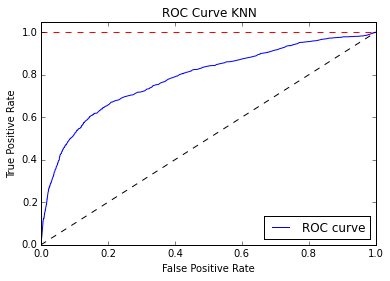

In [97]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


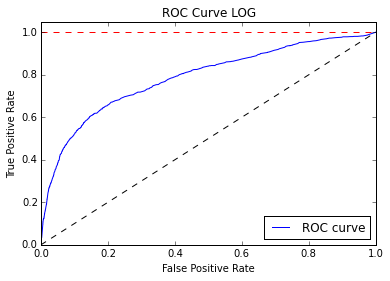

In [98]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LOG')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


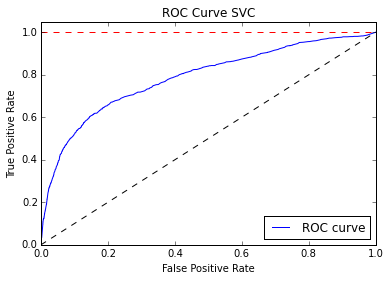

In [99]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


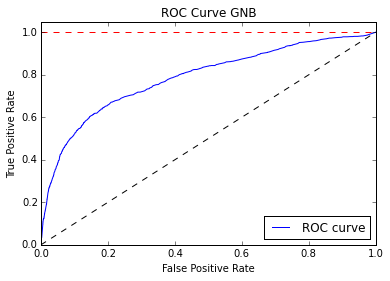

In [100]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve GNB')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


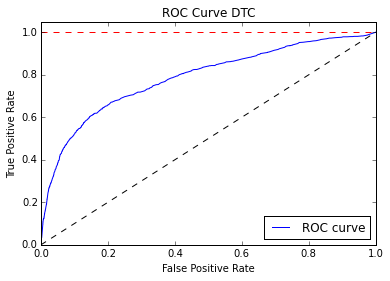

In [101]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_dtc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DTC')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


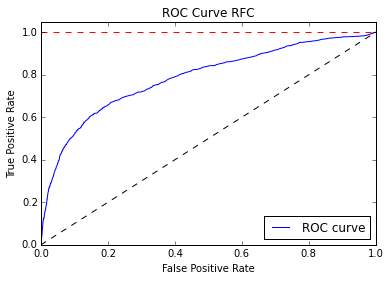

In [102]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RFC')
plt.legend(loc="lower right")
plt.show()

In [103]:
accuracy_score(y_test, y_pred_knn)

0.93387185104052572

In [104]:
accuracy_score(y_test, y_pred_log)

0.93592552026286968

In [105]:
accuracy_score(y_test, y_pred_svc)

0.93400876232201535

In [106]:
accuracy_score(y_test, y_pred_gnb)

0.92914841182913477

In [107]:
accuracy_score(y_test, y_pred_dtc)

0.93387185104052572

In [108]:
accuracy_score(y_test, y_pred_rfc)

0.93325575027382257

In [109]:
roc_auc_knn

0.77022201407729152

In [110]:
roc_auc_log

0.79403689576839465

In [111]:
roc_auc_svc

0.59739051947442856

In [112]:
roc_auc_gnb

0.77746971927191555

In [113]:
roc_auc_dtc

0.76719653431174473

In [114]:
roc_auc_rfc

0.78618377142980833

## Unsupervised classification, Neural Networks, test set %